In [65]:
import plotly.express as px
import hvplot.pandas
import pandas as pd 
import panel as pn
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')
#pn.extension()

In [49]:
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

In [32]:
avg_job_created_df = pd.read_csv(Path('Resources/avg_job_create.csv'))
job_created_map = pd.read_csv(Path('Resources/job_created_map.csv'))
ny_ca_simulated_df = pd.read_csv(Path('Resources/ny_ca_simulation.csv'))
migration_2018 = pd.read_csv(Path('Resources/moving-2018.csv'))
migration_2019 = pd.read_csv(Path('Resources/moving-2019.csv'))
map_df = pd.read_csv(Path('Resources/us_map_data.csv'), index_col=0)

In [4]:
def job_created_graph():
    return avg_job_created_df.hvplot.line(
    "Date",
    "Average_Job_Created",
    xlabel="Date",
    rot=90,
    ylabel="Average Job Created (THOUSANDS)",
    groupby="State",
    )

In [5]:
def simulated_jobs(): 
    return ny_ca_simulated_df.hvplot(legend= None, figsize=(20,20), xlabel= "Jobs",ylabel= "Months")

In [6]:
def mig_2018_graph_top():
    top_5 = migration_2018.head(5)
    top_5_graph = top_5.hvplot.bar(x="State",
                 y="Ranking-2018",
                 hover_cols = ['Outbound-2018','Inbound-2018'],
                 title= "Top 5 States With least Outbound shipment and Most Inbound shipment")
    return top_5_graph

In [7]:
def mig_2018_graph_bottom():
    bottom_5 = migration_2018.tail(5)
    bottom_5_graph = bottom_5.hvplot.bar(x="State",
                 y="Ranking-2018",
                 hover_cols = ['Outbound-2018','Inbound-2018'],
                 title= " Top 5 States with Most Outbound shipment and Least Inbound shipment")
    return bottom_5_graph

In [8]:
def mig_2019_graph_top():
    top_5 = migration_2019.head(5)
    top_5_graph =top_5.hvplot.bar(x="State",
                 y="Ranking-2019",
                 hover_cols = ['Outbound-2019','Inbound-2019'],
                 title= "Top 5 States with Most Outbound shipment and Least Inbound shipment")
    return top_5_graph

In [9]:
def mig_2019_graph_bottom():
    bottom_5 = migration_2019.tail(5)
    bottom_5_graph =bottom_5.hvplot.bar(x="State",
                 y="Ranking-2019",
                 hover_cols = ['Outbound-2019','Inbound-2019'],
                 title= "Top 5 States with Least Outbound shipment and most Inbound shipment")
    return bottom_5_graph

In [67]:
def us_map_data():
    """US Scatter Plot Map Showing Financial Mobility Data"""
    fig = px.scatter_mapbox(map_df, 
                      hover_data = ['Mean Income per State',
                                  'Poverty Income Threshold',
                                  'Rent Per State',
                                  'Unemployment Rate'],
                      color = 'State', size = 'Confortability Income Threshold', 
                      lon ='Longitude', lat='Latitude', hover_name ='State', 
                      center={'lat':38.5,'lon':-97.5}, zoom = 3, 
                      width = 900, height = 500, animation_frame = 'Year',
                      title = 'Which state is the Best Fit for Today and Tomorrow'
                      )
    
    return fig

In [11]:
data_df = pd.read_csv(Path('Resources/hvplot_data.csv'),index_col='Year').drop(columns='Unnamed: 0')
data_df.index=pd.to_datetime(data_df.index, format='%Y-%m-%d').year

In [12]:
# create a fuction that will return a graph depending on users input
def generate_graph(x='Year',y=None,kind=None):
    if kind=='bar':
        fig= data_df.hvplot(x,y,kind,rot=90, ylabel='Unemployment Rate',ylim=(0.00,7.00), width=800,height=400)
    else:
        fig= data_df.hvplot(x,y,kind,rot=90, ylabel='Unemployment Rate',ylim=(0.00,7.00), grid=True, padding=(0,.01),
                           width=800,height=400)                 
    return fig

In [13]:
# create a list of options to pass into the interactive widget CrossSelector fuction
# to compare unemployment rates between states
columns = list(data_df.columns)
list_of_choices = pn.widgets.CrossSelector(options=columns, width=300)

# Create list of graph options available for the user
# Line graph is the default value
kind=pn.widgets.Select(name='Type of Graph', value='line',options=['line','bar'])

# Create the interactive layout, where we will be calling into the generate_graph()
# Each time the user makes a change
unemp_column = pn.interact(generate_graph, y = list_of_choices, kind = kind)

unemp_column=pn.Column('Select States for Comparison',pn.Row(unemp_column[0],unemp_column[1]))

In [14]:
job_created_graph()

:DynamicMap   [State]
   :Curve   [Date]   (Average_Job_Created)

In [15]:
simulated_jobs()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [16]:
mig_2018_graph_top()

:Bars   [State]   (Ranking-2018,Outbound-2018,Inbound-2018)

In [17]:
mig_2018_graph_bottom()

:Bars   [State]   (Ranking-2018,Outbound-2018,Inbound-2018)

In [18]:
mig_2019_graph_top()

:Bars   [State]   (Ranking-2019,Outbound-2019,Inbound-2019)

In [19]:
mig_2019_graph_bottom()

:Bars   [State]   (Ranking-2019,Outbound-2019,Inbound-2019)

In [20]:
unemp_column()

TypeError: 'Column' object is not callable

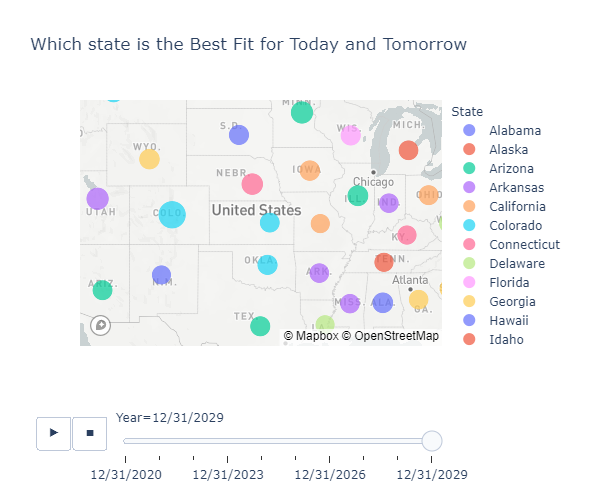

In [73]:
us_map_data()

In [21]:
sim_title = pn.pane.Markdown("""

### Job Growth Simulation For NY and CA
""")

In [22]:
job_created_columns=pn.Column(job_created_graph(),
                   sim_title,simulated_jobs())

In [71]:
geo_map = pn.Column(
    "## Which State is the best Fit for You Today and Tomorrow.", us_map_data()
)

In [72]:
dash_board = pn.Tabs(('Welcome', job_created_columns),
                     ('US Map Data', geo_map),
                     ('Unemployment', unemp_column)
                    )

dash_board.servable()

Tabs
    [0] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='State', options=['ALABAMA', 'ALASKA', ...], value='ALABAMA', width=250)
                [1] VSpacer()
        [1] Markdown(str)
        [2] HoloViews(NdOverlay)
    [1] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] CrossSelector(options=['Alabama', 'Alaska', ...], width=300)
                [1] Select(name='Type of Graph', options=['line', 'bar'], value='line')
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive01337')